#[COE 197-Z] My 3-Layer MLP on CIFAR-10

**Objectives**
*   Compare the performance of 3-Layer CNN and 3-Layer MLP on the CIFAR-10 Dataset
*   Practice coding with Keras, specifically Keras Functional API

**Changelog**
*   Created and achieved ~33% accuracy. [3/8/2019]
*   Changed : batch_size: 32 --> 512, improved accuracy to --> 46.37% but still underfitting.
*   Changed optimizer: adam --> sgd, increased epochs 25 --> 100, increased accuracy to 49.98%
*   Hidden_units back to 512, increased epochs 100 --> 200, increased accuracy --> 54%
*   Added history plots of model training vs validation accuracy and loss [3/9/2018]
*   Decreased hidden units to 256, halved epochs from 200 --> 100, reduced batch size to 128, increased accuracy to --> 54.22%

Data Dimensions Original: (50000, 32, 32, 3)
Images Flattened to Arrays: (50000, 3072)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-tra

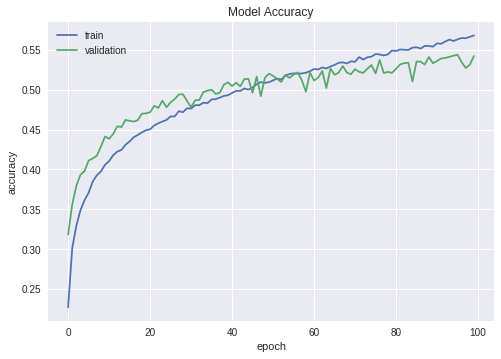

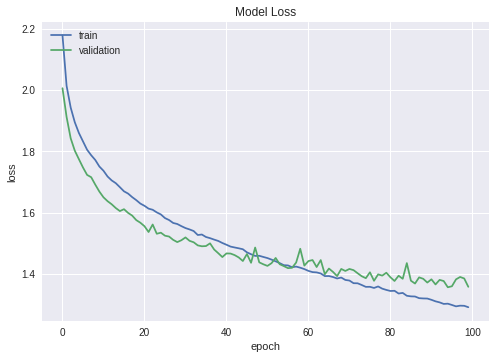

In [2]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l2
from keras.utils import to_categorical
from keras.datasets import cifar10

import matplotlib.pyplot as plt

#Reproducibility seed
np.random.seed(1)

#Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Convert from sparse label to Categorical (one-hot vector)
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Reshape and Normalize input images
"""
  Note: How to reshape CIFAR-10 to fit in MLP
  Unlike CNN, MLP cannot take (32x32x3) and must take a 1D array, this is why
  the MNIST dataset is flattened from (28x28x1) imgs  to a 28 x 28 = 784 array.
  
  MNIST has grayscale = 1 value per pixel, unlike CIFAR-10 which has rgb = 3
  value per pixel. Thus, CIFAR must be flattened to a 38 x 38 x 3 = 3072 array
  
  Note2: Recall shape attribute of cifar training data is (50000, 32, 32, 3)
"""

print("Data Dimensions Original: {}".format(x_train.shape))

img_array = x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
x_train = x_train.reshape(-1, img_array).astype('float32') / 255
x_test = x_test.reshape(-1, img_array).astype('float32') / 255

print("Images Flattened to Arrays: {}".format(x_train.shape))

#Network Parameters
input_dim = (img_array,) #Required na tuple yung dimensions, eh array
batch_size = 128
epochs = 100

hidden_units = 256
dropout = 0.3
kernel_regularizer = l2(0.0001)

# MLP Layers (functional API)
inputs = Input(shape=input_dim)
y = Dense(hidden_units,
          input_dim=input_dim,
          kernel_regularizer=kernel_regularizer,
          activation='relu')(inputs)
y = Dropout(dropout)(y)

y = Dense(hidden_units,
          input_dim=input_dim,
          kernel_regularizer=kernel_regularizer,
          activation='relu')(y)
y = Dropout(dropout)(y)

outputs = Dense(num_labels, activation='softmax')(y)

#Build the Model, show the summary
model = Model(inputs=inputs, outputs=outputs)
model.summary()

#Set Loss Function, Optimizer, and Accuracy Metric
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#Train the model with input images and labels
history = model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=epochs,
          batch_size=batch_size)

#Final Accuracy on Test Data Set
scores = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest Accuracy: %.2f%%" % (100.0 * scores[1])) 

#Plot validation vs training accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Plot validation vs training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()